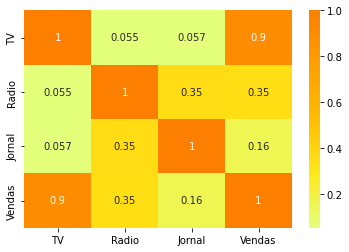

In [6]:
# extrair os dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tabela = pd.read_csv(r'C:\Users\HOME\Desktop\Intensivão Python\Aula 4\advertising.csv')

# análise exploratória
tabela.corr()
sns.heatmap(tabela.corr(), annot=True, cmap='Wistia')
plt.show()

# modelagem + IA
y = tabela['Vendas']
x = tabela[['TV', 'Radio', 'Jornal']]
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
regressao_model = LinearRegression()
arvore_model = RandomForestRegressor()
regressao_model.fit(x_treino, y_treino)
arvore_model.fit(x_treino, y_treino)

prev_regressao = regressao_model.predict(x_teste)
prev_arvore = arvore_model.predict(x_teste)

In [7]:
# eficácia da previsão
from sklearn.metrics import r2_score
print(r2_score(y_teste, prev_regressao))
print(r2_score(y_teste, prev_arvore))

0.9154947480641835
0.9571151745390447


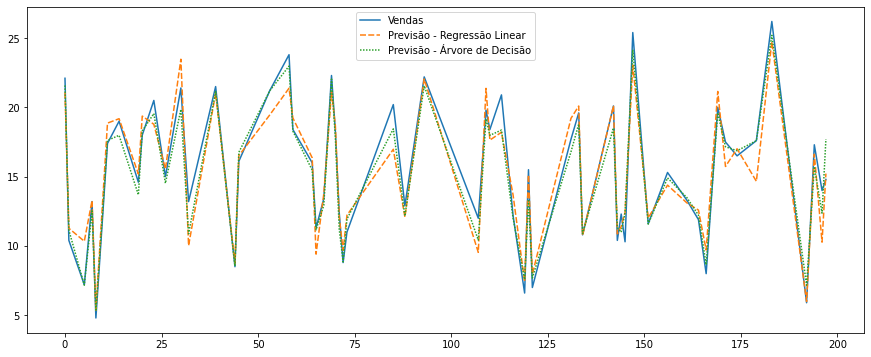

In [10]:
# visualização dos modelos
auxiliar = pd.DataFrame()
auxiliar['Vendas'] = y_teste
auxiliar['Previsão - Regressão Linear'] = prev_regressao
auxiliar['Previsão - Árvore de Decisão'] = prev_arvore

plt.figure(figsize=(15, 6))
sns.lineplot(data=auxiliar)
plt.show()

In [12]:
# previsão
novos = pd.read_csv(r'C:\Users\HOME\Desktop\Intensivão Python\Aula 4\novos.csv')
previsao = arvore_model.predict(novos)
print(previsao)

[ 7.718  8.638 20.298]
